# Create b_bottom from LowLou

In [ ]:
#| default_exp prepare_lowlou

In [ ]:
from setproctitle import setproctitle
setproctitle("LowLou")

In [ ]:
#| export
import os
import numpy as np
import matplotlib.pyplot as plt

from cmspinn.lowlou_mag import LowLouMag

bounds = [x_min, x_max, y_min, y_max, z_min, z_max]

In [ ]:
#| export
class PrepareLowLou:
    def __init__(self, base_path, bounds=[-1, 1, -1, 1, 0, 2], Nx=64, Ny=64, Nz=64, n=1, m=1, l=0.3, Phi=np.pi/3, abs=True):
        self.lowlou_path = os.path.join(base_path, f'lowlou_{Nx}_{Ny}_{Nz}')
        os.makedirs(self.lowlou_path, exist_ok=True)
        self.bounds = bounds
        self.Nx = Nx
        self.Ny = Ny
        self.Nz = Nz
        self.n = n
        self.m = m
        self.l = l
        self.Phi = Phi
        self.abs = abs

    def cal_and_save_lowlou(self):
        b_path = os.path.join(self.lowlou_path, 'b.vtk')
        if os.path.exists(b_path):
            print(f'Exist {b_path}')
            return
        lowlou = LowLouMag(bounds=self.bounds, resolutions=[self.Nx, self.Ny, self.Nz], n=self.n, m=self.m, l=self.l, Phi=self.Phi, abs=self.abs) 
        lowlou.calculate()
        lowlou.redefine_mesh()
        self.grid = lowlou.newgrid 
        self.bottom = lowlou.b_bottom

        self.grid.save(b_path)
        print(f"Saved {b_path}")

        return self.grid 
    
    def plot_and_save_lowlou_bottom(self, plot=True):
        os.makedirs(os.path.join(self.lowlou_path, 'b_bottom'), exist_ok=True)
        b_bottom_path = os.path.join(os.path.join(self.lowlou_path, 'b_bottom'), 'b_bottom.npy')
        if os.path.exists(b_bottom_path):
            print(f'Exist {b_bottom_path}')
            return
        
        b_bottom = np.array(self.bottom)

        with open (b_bottom_path, 'wb') as f:
            np.save(f, b_bottom)
        print(f"Saved {b_bottom_path}")

        if plot is True:
            plt.close()
            fig, ax = plt.subplots(figsize=(6,6))
            CS = plt.imshow(b_bottom[:, :, 2].transpose(), origin='lower', cmap='gray')
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            fig.colorbar(CS, label=r'$B_z$'+f'(z={0})')
            plt.show()

In [ ]:
Nx, Ny, Nz = 64, 64, 64

In [ ]:
base_path = os.path.expanduser('~/workspace/_data')

In [ ]:
creater = PrepareLowLou(base_path=base_path,
                        bounds=[-1, 1, -1, 1, 0, 2], Nx=Nx, Ny=Ny, Nz=Nz, 
                        n=1, m=1, l=0.3, Phi=np.pi/3, 
                        abs=True)

In [ ]:
creater.cal_and_save_lowlou()

Saved /userhome/jeon_mg/workspace/_data/lowlou_64_64_64/b.vtk


StructuredGrid (0x7fda2e5ca080)
  N Cells:      250047
  N Points:     262144
  X Bounds:     0.000e+00, 6.300e+01
  Y Bounds:     0.000e+00, 6.300e+01
  Z Bounds:     0.000e+00, 6.300e+01
  Dimensions:   64, 64, 64
  N Arrays:     2

Saved /userhome/jeon_mg/workspace/_data/lowlou_64_64_64/b_bottom.npy


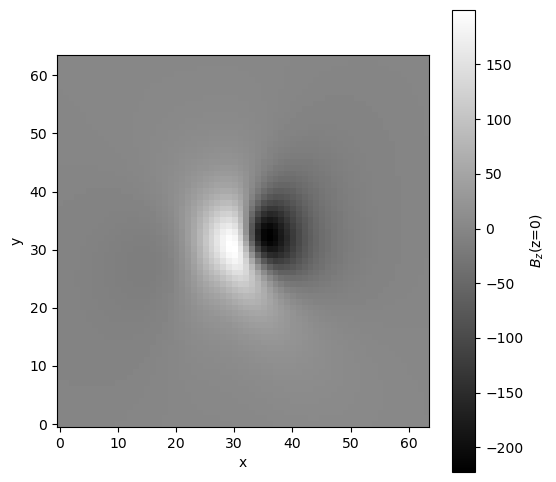

In [ ]:
creater.plot_and_save_lowlou_bottom()